# Task 11: SVM – Breast Cancer Classification

- Data loading & inspection
- Train-test split
- Linear & RBF SVM
- Hyperparameter tuning
- Evaluation (Confusion Matrix, ROC, AUC)
- Model saving


In [1]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)
import joblib

# load dataset

In [11]:
df = pd.read_csv("breast-cancer.csv")
df.head()
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target

print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("Target value counts:\n", y.value_counts())
X.head()


Feature shape: (569, 30)
Target shape: (569,)
Target value counts:
 target
1    357
0    212
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Train-Test split

In [3]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 455
Test size: 114


# Linear SVM (Baseline Model)

In [4]:
linear_svm_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', probability=True, random_state=42))
])

linear_svm_pipeline.fit(X_train, y_train)
y_pred_linear = linear_svm_pipeline.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))


Linear SVM Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  1]
 [ 2 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# RBF SVM Model

In [5]:
rbf_svm_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))
])

rbf_svm_pipeline.fit(X_train, y_train)
y_pred_rbf = rbf_svm_pipeline.predict(X_test)

print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))


RBF SVM Accuracy: 0.9824561403508771
Confusion Matrix:
 [[41  1]
 [ 1 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# Hyperparameter Tuning using GridSearchCV

In [6]:

param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.001, 0.01, 0.1, 1],
    'svm__kernel': ['rbf']
}

grid = GridSearchCV(
    rbf_svm_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

Best Parameters: {'svm__C': 10, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}


# ROC Curve & AUC

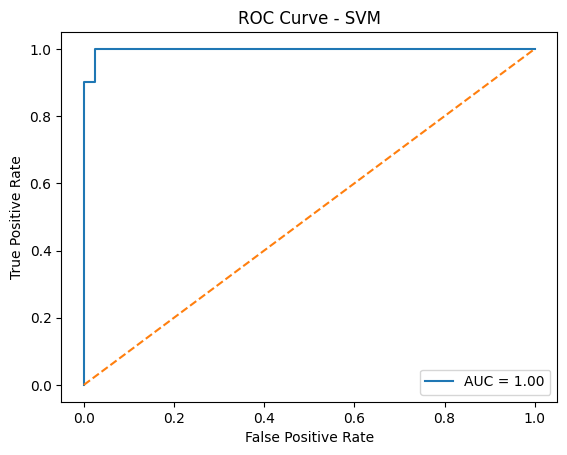

In [7]:

y_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

# Save the Trained Model

In [9]:
joblib.dump(best_model, "svm_breast_cancer_model.pkl")
print("Model saved as svm_breast_cancer_model.pkl")

Model saved as svm_breast_cancer_model.pkl
